In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib


In [10]:
# Učitavanje dataset-a
df = pd.read_csv("auta.csv")

# Prikaz prvih nekoliko redova
df.head()


,Unnamed: 0,id,Kubikaža,Broj vrata,Gorivo,Kilovata (KW),Lokacija,Proizvođač,Kilometraža,Model,Cijena,Naslov,Godište
0,0,53790160,1.9,4/5,Dizel,88.0,Banja Luka,Alfa Romeo,299500.0,Alfa 147,7500.0,Alfa Romeo Alfa 147,2005.0
1,1,52440211,2.0,4/5,Benzin,206.0,Laktaši,Alfa Romeo,1.0,Stelvio,131500.0,NARUDŽBA ALFA ROMEO STELVIO 2.0TB 280KS AT Q4,2023.0
2,2,49131197,1.5,4/5,Hibrid,96.0,Laktaši,Alfa Romeo,5.0,Tonale,85990.0,Alfa Romeo Tonale,2022.0
3,3,53468631,1.9,4/5,Dizel,85.0,Vogošća,Alfa Romeo,300000.0,Alfa 156,1999.0,Alfa Romeo Alfa 156 1.9 JTD 85kw Klima,2001.0
4,4,53608637,1.9,2/3,Dizel,85.0,Visoko,Alfa Romeo,289121.0,Alfa 147,3900.0,Alfa Romeo Alfa 147 2003 god. 1.9 JTD Reg. Do ...,2003.0


In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'Kubikaža', 'Broj vrata', 'Gorivo', 'Kilovata (KW)',
       'Lokacija', 'Proizvođač', 'Kilometraža', 'Model', 'Cijena', 'Naslov',
       'Godište'],
      dtype='object')

In [12]:
df.drop(columns=['Unnamed: 0','id','Naslov'], inplace=True)

In [13]:
df.head()

,Kubikaža,Broj vrata,Gorivo,Kilovata (KW),Lokacija,Proizvođač,Kilometraža,Model,Cijena,Godište
0,1.9,4/5,Dizel,88.0,Banja Luka,Alfa Romeo,299500.0,Alfa 147,7500.0,2005.0
1,2.0,4/5,Benzin,206.0,Laktaši,Alfa Romeo,1.0,Stelvio,131500.0,2023.0
2,1.5,4/5,Hibrid,96.0,Laktaši,Alfa Romeo,5.0,Tonale,85990.0,2022.0
3,1.9,4/5,Dizel,85.0,Vogošća,Alfa Romeo,300000.0,Alfa 156,1999.0,2001.0
4,1.9,2/3,Dizel,85.0,Visoko,Alfa Romeo,289121.0,Alfa 147,3900.0,2003.0


 Provjera i imputacija NaN vrijednosti

In [14]:
# Provjera nedostajućih vrijednosti
print(df.isna().sum())

# Definisanje numeričkih i kategorijskih kolona
num_cols = ['Kubikaža', 'Kilovata (KW)', 'Kilometraža', 'Cijena', 'Godište']
cat_cols = ['Broj vrata']

# Imputacija numeričkih kolona medianom
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Imputacija kategorijskih kolona najčešćom vrijednošću
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Provjera ponovo
print("\nNakon imputacije:")
print(df.isna().sum())


Kubikaža           13
Broj vrata          4
Gorivo              0
Kilovata (KW)      10
Lokacija            0
Proizvođač          0
Kilometraža         2
Model               0
Cijena           1683
Godište             2
dtype: int64

Nakon imputacije:
Kubikaža         0
Broj vrata       0
Gorivo           0
Kilovata (KW)    0
Lokacija         0
Proizvođač       0
Kilometraža      0
Model            0
Cijena           0
Godište          0
dtype: int64


Deskriptivna statistika

In [15]:

df.describe()


,Kubikaža,Kilovata (KW),Kilometraža,Cijena,Godište
count,28553.000000,2.855300e+04,28553.000000,28553.000000,28553.000000
mean,1.955287,3.831652e+02,210759.390642,21943.908591,2009.338914
std,0.589951,3.251405e+04,96730.931744,24881.752226,21.473874
min,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,1.600000,7.700000e+01,163000.000000,8900.000000,2006.000000
50%,2.000000,9.000000e+01,223454.000000,14990.000000,2010.000000
75%,2.000000,1.180000e+02,270000.000000,25900.000000,2014.000000
max,7.500000,5.436766e+06,999999.000000,757000.000000,2023.000000


Filtriranje samo BMW vozila

In [16]:
# Filtriranje BMW vozila
bmw_df = df[df['Proizvođač'].str.lower() == 'bmw']

# Prikaz osnovnih informacija
bmw_df.info()

# Prvih par redova za pregled
bmw_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1848 entries, 2445 to 4292
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kubikaža       1848 non-null   float64
 1   Broj vrata     1848 non-null   object 
 2   Gorivo         1848 non-null   object 
 3   Kilovata (KW)  1848 non-null   float64
 4   Lokacija       1848 non-null   object 
 5   Proizvođač     1848 non-null   object 
 6   Kilometraža    1848 non-null   float64
 7   Model          1848 non-null   object 
 8   Cijena         1848 non-null   float64
 9   Godište        1848 non-null   float64
dtypes: float64(5), object(5)
memory usage: 158.8+ KB


,Kubikaža,Broj vrata,Gorivo,Kilovata (KW),Lokacija,Proizvođač,Kilometraža,Model,Cijena,Godište
2445,2.0,4/5,Dizel,100.0,Sarajevo - Centar,BMW,380000.0,Series 3 (Svi),4500.0,2000.0
2446,2.0,4/5,Dizel,110.0,Brčko,BMW,400000.0,320,4800.0,2003.0
2447,2.0,4/5,Dizel,100.0,Kiseljak,BMW,366000.0,320,4650.0,2001.0
2448,1.8,4/5,Benzin,85.0,Žepče,BMW,209523.0,316,4000.0,2002.0
2449,2.0,4/5,Dizel,110.0,Zvornik,BMW,300000.0,320,3700.0,2004.0


Deskriptivna statistika samo za BMW

In [17]:
bmw_df.describe()

,Kubikaža,Kilovata (KW),Kilometraža,Cijena,Godište
count,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000
mean,2.413095,146.222403,227425.954545,31849.680736,2009.066558
std,0.607204,118.927092,91820.663709,29823.347778,43.987120
min,0.600000,0.000000,0.000000,1234.000000,135.000000
25%,2.000000,109.500000,179787.250000,13500.000000,2007.000000
50%,2.000000,135.000000,240000.000000,24743.500000,2010.000000
75%,3.000000,170.000000,285000.000000,38000.000000,2014.000000
max,6.600000,4395.000000,723534.000000,240000.000000,2023.000000


Histogrami numeričkih varijabli za BMW

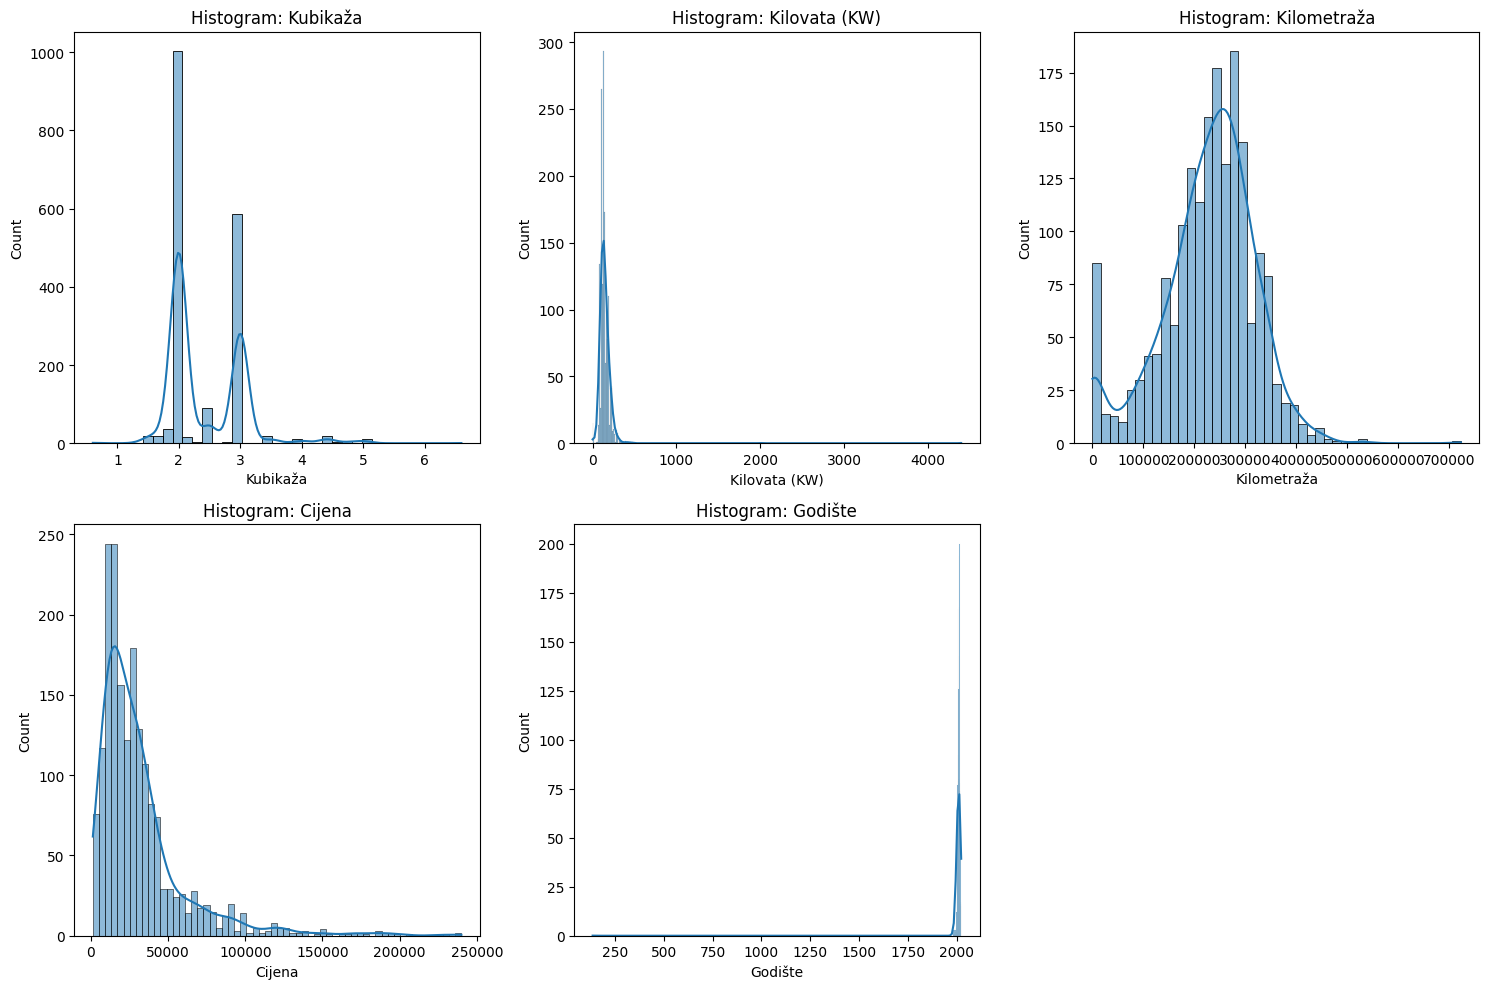

In [18]:
# Histogrami samo za BMW
num_cols_plot = ['Kubikaža', 'Kilovata (KW)', 'Kilometraža', 'Cijena', 'Godište']

plt.figure(figsize=(15,10))
for idx, col in enumerate(num_cols_plot, 1):
    plt.subplot(2,3,idx)
    sns.histplot(bmw_df[col], kde=True)
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

Boxplotovi numeričkih varijabli za BMW

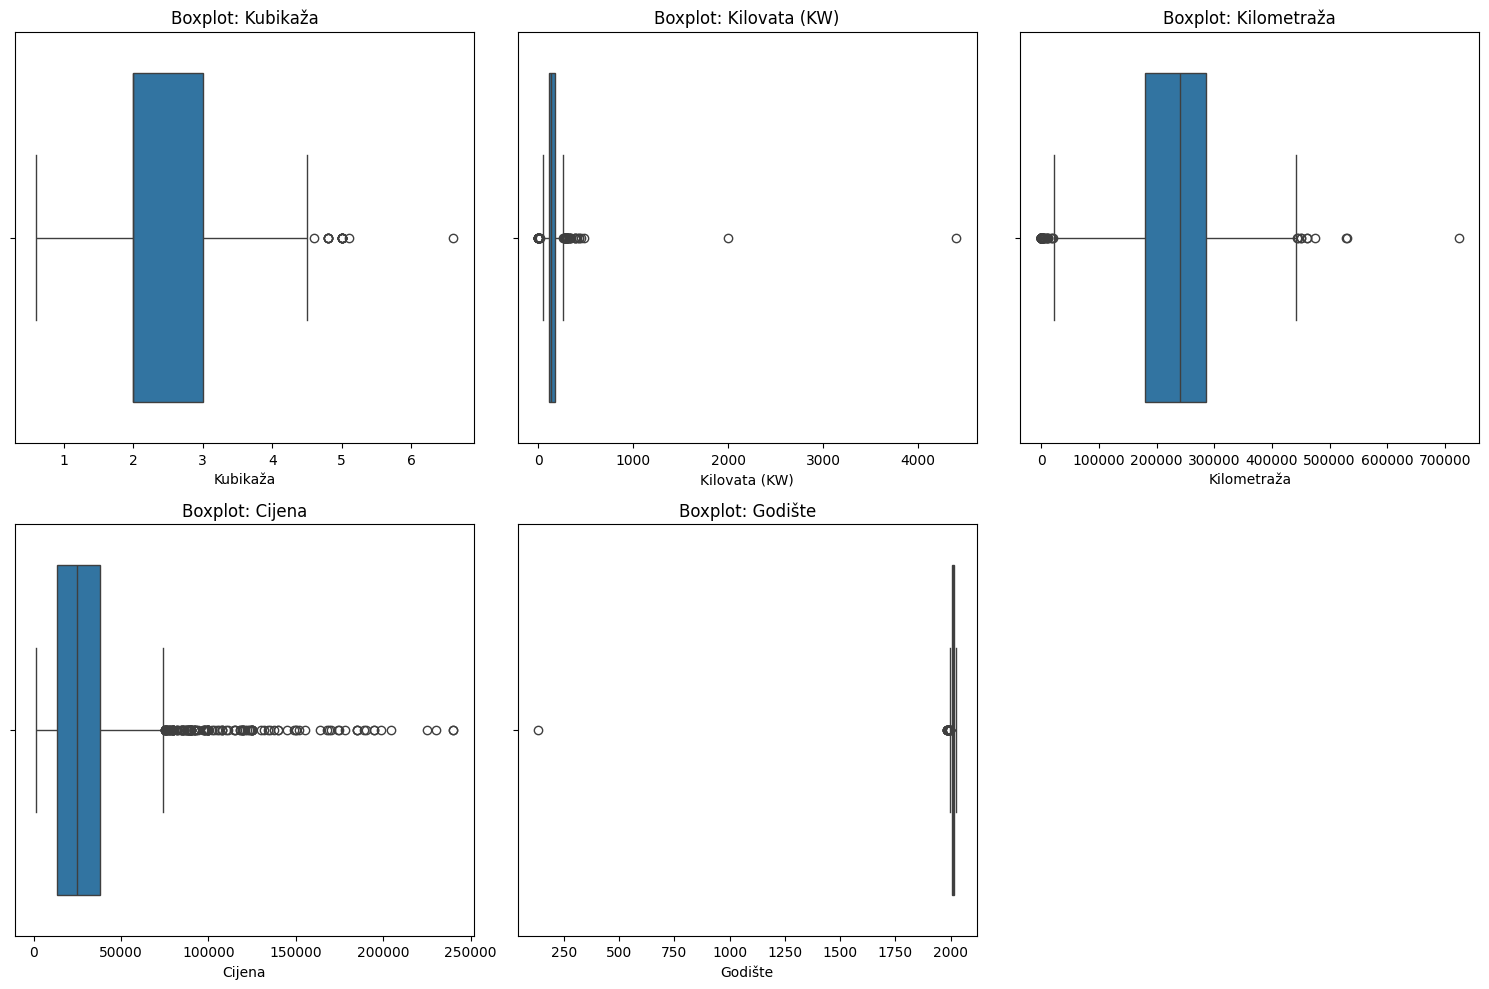

In [19]:
# Boxplotovi samo za BMW
plt.figure(figsize=(15,10))
for idx, col in enumerate(num_cols_plot, 1):
    plt.subplot(2,3,idx)
    sns.boxplot(x=bmw_df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

Korelacija numeričkih varijabli za BMW

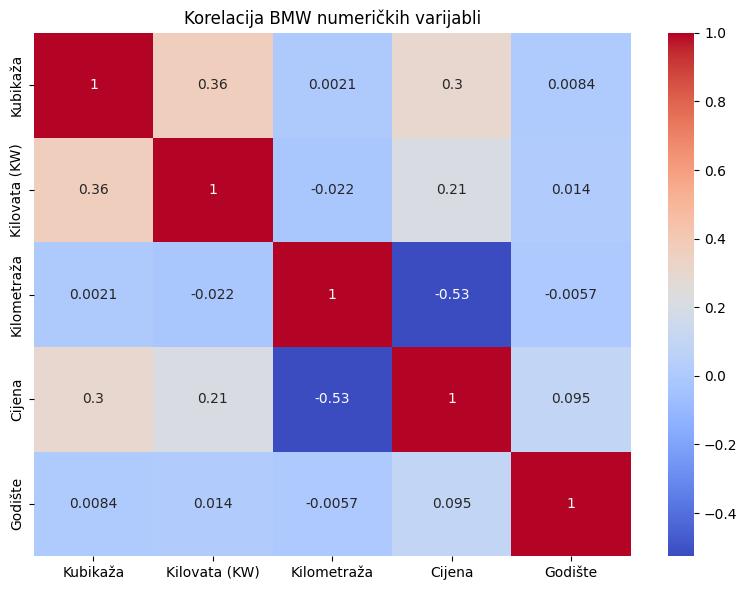

In [20]:
# Korelacija numeričkih varijabli za BMW
bmw_corr = bmw_df[['Kubikaža', 'Kilovata (KW)', 'Kilometraža', 'Cijena', 'Godište']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(bmw_corr, annot=True, cmap='coolwarm')
plt.title("Korelacija BMW numeričkih varijabli")
plt.tight_layout()
plt.show()


Priprema podataka za modeliranje

In [22]:
# Priprema podataka za modeliranje
# X i y
X = bmw_df.drop(columns=['Cijena', 'Model', 'Proizvođač', 'Lokacija'])
y = bmw_df['Cijena']

# Prikaz X da vidiš koje kolone imamo
X.head()

,Kubikaža,Broj vrata,Gorivo,Kilovata (KW),Kilometraža,Godište
2445,2.0,4/5,Dizel,100.0,380000.0,2000.0
2446,2.0,4/5,Dizel,110.0,400000.0,2003.0
2447,2.0,4/5,Dizel,100.0,366000.0,2001.0
2448,1.8,4/5,Benzin,85.0,209523.0,2002.0
2449,2.0,4/5,Dizel,110.0,300000.0,2004.0


Podjela na train/test set

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1478, 6)
Test shape: (370, 6)


Pipeline i GridSearch za sve modele odjednom

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Definicija numeričkih i kategorijskih kolona
num_cols = ['Kubikaža', 'Kilovata (KW)', 'Kilometraža', 'Godište']
cat_cols = ['Broj vrata', 'Gorivo']

# ColumnTransformer za obradu podataka
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Pipeline: preprocessor + regressor
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DummyRegressor())
])

# Param grid za sve modele
param_grid = [
    {
        'regressor': [SVR()],
        'regressor__C': [0.1, 1, 10],
        'regressor__epsilon': [0.1, 0.2],
        'regressor__kernel': ['linear', 'rbf'],
        'regressor__gamma': ['scale']
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [5, 10],
        'regressor__min_samples_split': [2, 5],
        'regressor__max_features': ['sqrt', 'log2']
    },
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [3, 5],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__algorithm': ['auto'],
        'regressor__leaf_size': [30]
    }
]

# GridSearchCV
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1 # za pralelizaciju izvršavanja (ako ne radi, ukinuti ovaj parametar)
)

# Fit model
grid.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Kubikaža',
                                                                          'Kilovata '
                                                                          '(KW)',
                                                                          'Kilometraža',
                                                                          'Godište']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Broj '
                                                                          'vrata',
                                                                          'Gorivo'])])),
                                       ('regressor', DummyRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [SVR()], 'regressor__C': [0.1, 1, 10],
                          'r...
                         {'regressor': [RandomForestRegressor(random_state=42)],
                          'regressor__max_depth': [5, 10],
                          'regressor__max_features': ['sqrt', 'log2'],
                          'regressor__min_samples_split': [2, 5],
                          'regressor__n_estimators': [50, 100]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__algorithm': ['auto'],
                          'regressor__leaf_size': [30],
                          'regressor__n_neighbors': [3, 5],
                          'regressor__weights': ['uniform', 'distance']}],
             scoring='r2', verbose=2)

Evaluacija najboljeg modela

In [ ]:
#  Evaluacija najboljeg modela
y_pred = grid.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Ovako je univerzalno za sve verzije

print("Najbolji model:", grid.best_estimator_)
print("Najbolji parametri:", grid.best_params_)
print(f"R2: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Najbolji model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Kubikaža', 'Kilovata (KW)',
                                                   'Kilometraža', 'Godište']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Broj vrata', 'Gorivo'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_split=5, random_state=42))])
Najbolji parametri: {'regressor': RandomForestRegressor(random_state=42), 'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
R2: 0.870
MAE: 5920.55
RMSE: 10780.76


In [ ]:
RF = RandomForestRegressor(max_depth=10, max_features= 'sqrt')
RF.fit(X_train, y_train)

